In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
dataset = pd.read_csv('/content/drive/My Drive/Position/Position_Salaries_poly.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

NameError: ignored

getting dataset from my drive, like last hw divide dataset to 2 vectors for independent vs dependent


In [ ]:
y = y.reshape(len(y), 1)

this converts values between 0-1 using feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
s_c_x = StandardScaler()
s_c_y= StandardScaler()
X = s_c_x.fit_transform(X)
y = s_c_y.fit_transform(y)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

imported SVR, converting the input to the original value using the inverse transform

In [ ]:
s_c_y.inverse_transform(regressor.predict(s_c_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

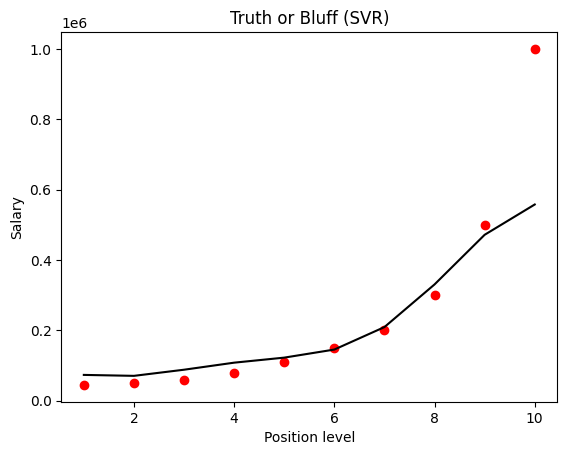

In [ ]:
plt.scatter(s_c_x.inverse_transform(X), s_c_y.inverse_transform(y), color = 'red')
plt.plot(s_c_x.inverse_transform(X), s_c_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'black')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

plotting the SVR based on Position(x-axis) and salary(y-axis) using the matplotlib